# Importing Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from scipy import stats

#### Reading dataset

In [2]:
# Load your dataset (replace this path with your actual dataset path)
df=pd.read_csv("D:\DataScience\Machine Learning Projects\Loan_dataset.csv")

In [39]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.000000,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.000000,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.000000,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.000000,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.000000,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0.000000,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,0.554745,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1.000000,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2.000000,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


#### Handle missing values

In [3]:

df['Dependents'] = pd.to_numeric(df['Dependents'], errors='coerce')
mean1 = df['Dependents'].mean()
df['Dependents'].fillna(mean1, inplace=True)

mean2 = df['Credit_History'].mean()
df['Credit_History'].fillna(mean2, inplace=True)

mean3 = df['Loan_Amount_Term'].mean()
df['Loan_Amount_Term'].fillna(mean3, inplace=True)

mean4 = df['LoanAmount'].mean()
df['LoanAmount'].fillna(mean4, inplace=True)

In [4]:
# Drop rows with any remaining null values
df.dropna(inplace=True)

In [5]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.000000,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.000000,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.000000,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.000000,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.000000,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0.000000,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,0.554745,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1.000000,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2.000000,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


In [6]:
df1=df.drop('Loan_ID',axis=1)

In [7]:
print(df1)

     Gender Married  Dependents     Education Self_Employed  ApplicantIncome  \
0      Male      No    0.000000      Graduate            No             5849   
1      Male     Yes    1.000000      Graduate            No             4583   
2      Male     Yes    0.000000      Graduate           Yes             3000   
3      Male     Yes    0.000000  Not Graduate            No             2583   
4      Male      No    0.000000      Graduate            No             6000   
..      ...     ...         ...           ...           ...              ...   
609  Female      No    0.000000      Graduate            No             2900   
610    Male     Yes    0.554745      Graduate            No             4106   
611    Male     Yes    1.000000      Graduate            No             8072   
612    Male     Yes    2.000000      Graduate            No             7583   
613  Female      No    0.000000      Graduate           Yes             4583   

     CoapplicantIncome  LoanAmount  Loa

In [8]:
# Drop rows with any remaining null values
df1.dropna(inplace=True)

#### Perform one-hot encoding

In [9]:

#col_encode=['Gender','Married','Education','Self_Employed','Property_Area','Loan_Status']
df1 = pd.get_dummies(df1)

In [10]:
df1

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_N,Loan_Status_Y
0,0.000000,5849,0.0,146.412162,360.0,1.0,False,True,True,False,True,False,True,False,False,False,True,False,True
1,1.000000,4583,1508.0,128.000000,360.0,1.0,False,True,False,True,True,False,True,False,True,False,False,True,False
2,0.000000,3000,0.0,66.000000,360.0,1.0,False,True,False,True,True,False,False,True,False,False,True,False,True
3,0.000000,2583,2358.0,120.000000,360.0,1.0,False,True,False,True,False,True,True,False,False,False,True,False,True
4,0.000000,6000,0.0,141.000000,360.0,1.0,False,True,True,False,True,False,True,False,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.000000,2900,0.0,71.000000,360.0,1.0,True,False,True,False,True,False,True,False,True,False,False,False,True
610,0.554745,4106,0.0,40.000000,180.0,1.0,False,True,False,True,True,False,True,False,True,False,False,False,True
611,1.000000,8072,240.0,253.000000,360.0,1.0,False,True,False,True,True,False,True,False,False,False,True,False,True
612,2.000000,7583,0.0,187.000000,360.0,1.0,False,True,False,True,True,False,True,False,False,False,True,False,True


In [11]:
# Drop specified columns
df1 = df1.drop(['Gender_Female', 'Married_No', 'Education_Not Graduate', 
              'Self_Employed_No', 'Loan_Status_N'], axis=1)

In [12]:
# Rename columns
new = {
    'Gender_Male': 'Gender', 
    'Married_Yes': 'Married', 
    'Education_Graduate': 'Education', 
    'Self_Employed_Yes': 'Self_Employed',
    'Loan_Status_Y': 'Loan_Status'
}
df1.rename(columns=new, inplace=True)

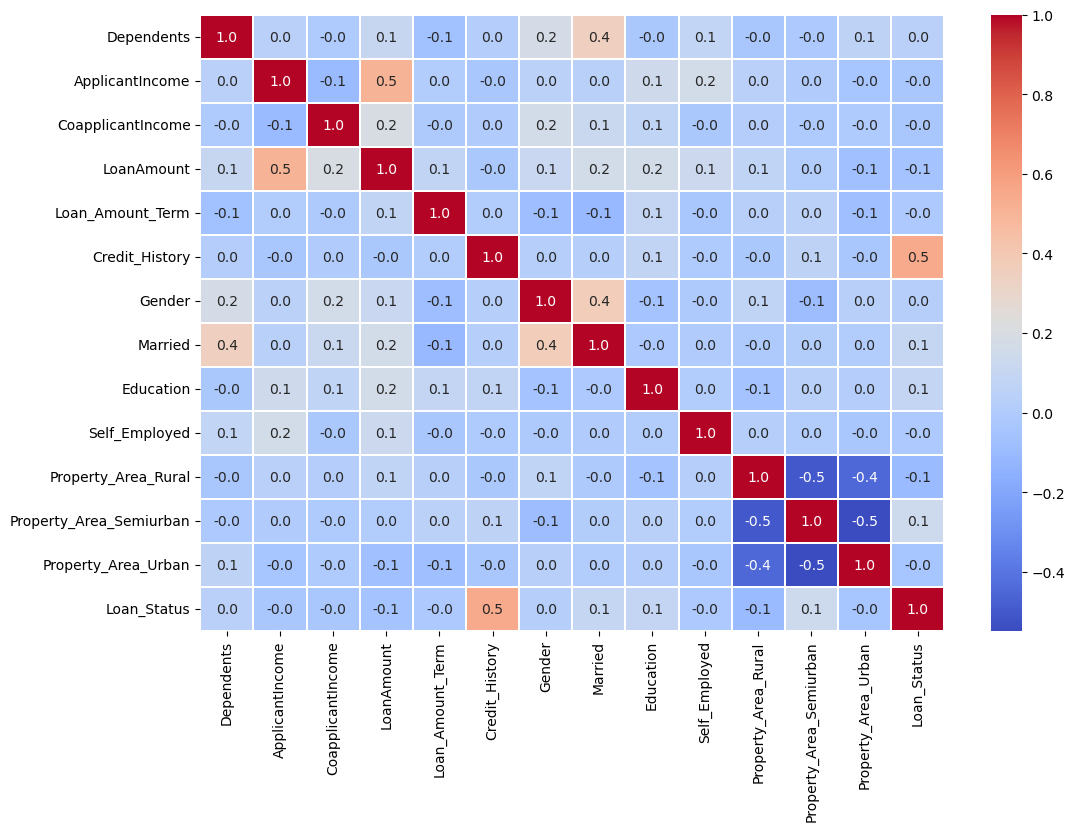

In [13]:
#Generating heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df1.corr(), cmap='coolwarm', annot=True, fmt='.1f', linewidths=.1)
plt.show()

- In this heatmap, we can clearly seen the relation between two variables
- The color intensity indiactes the strength of correlation, red represents positive and blue represnts negative correlation

#### Remove Outliers

In [14]:
# Remove outliers using IQR method (assuming you have defined the function remove_outliers_iqr)
def remove_outliers_iqr(df1, columns):
    for column in columns:
        Q1 = df1[column].quantile(0.25)
        Q3 = df1[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df1 = df1[(df[column] >= lower_bound) & (df1[column] <= upper_bound)]
    return df1

In [15]:
# Define columns for outlier detection
columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

In [16]:
# Remove outliers using defined function
df1 = remove_outliers_iqr(df1, columns)

C:\Users\Saurabh\AppData\Local\Temp\ipykernel_6020\3352629538.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df1 = df1[(df[column] >= lower_bound) & (df1[column] <= upper_bound)]
C:\Users\Saurabh\AppData\Local\Temp\ipykernel_6020\3352629538.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df1 = df1[(df[column] >= lower_bound) & (df1[column] <= upper_bound)]
C:\Users\Saurabh\AppData\Local\Temp\ipykernel_6020\3352629538.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df1 = df1[(df[column] >= lower_bound) & (df1[column] <= upper_bound)]


### Model Building

In [17]:
# Separate features and target
X = df1.drop(["Loan_Status"], axis=1)
y = df1["Loan_Status"]

In [18]:
X

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Education,Self_Employed,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0.0,5849,0.0,146.412162,360.0,1.0,True,False,True,False,False,False,True
1,1.0,4583,1508.0,128.000000,360.0,1.0,True,True,True,False,True,False,False
2,0.0,3000,0.0,66.000000,360.0,1.0,True,True,True,True,False,False,True
3,0.0,2583,2358.0,120.000000,360.0,1.0,True,True,False,False,False,False,True
4,0.0,6000,0.0,141.000000,360.0,1.0,True,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
607,2.0,3987,1411.0,157.000000,360.0,1.0,True,True,False,False,True,False,False
608,0.0,3232,1950.0,108.000000,360.0,1.0,True,True,True,False,True,False,False
609,0.0,2900,0.0,71.000000,360.0,1.0,False,False,True,False,True,False,False
612,2.0,7583,0.0,187.000000,360.0,1.0,True,True,True,False,False,False,True


#### Oversample minority class using SMOTE

In [19]:
X_resampled, y_resampled = SMOTE().fit_resample(X, y)

#### Scale features to a range (0, 1)

In [20]:
X_resampled = MinMaxScaler().fit_transform(X_resampled)

In [21]:
X_resampled

array([[0.        , 0.57857868, 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.5       , 0.45005076, 0.26808889, ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.2893401 , 0.        , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.        , 0.45989848, 0.3667119 , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.17258883, 0.50553685, ..., 1.        , 0.        ,
        1.        ],
       [0.59304486, 0.34944162, 0.        , ..., 1.        , 0.        ,
        1.        ]])

#### Spliting data

In [22]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=0)

## Training the model on Logistic Regression

In [23]:
# Initialize and train Logistic Regression model
LRclassifier = LogisticRegression(solver='saga', max_iter=500, random_state=1)
LRclassifier.fit(X_train, y_train)

LogisticRegression(max_iter=500, random_state=1, solver='saga')

In [24]:
# Predict using the trained model
y_pred = LRclassifier.predict(X_test)

#### Evaluate the model

In [48]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.98      0.78      0.87        59
        True       0.81      0.98      0.89        56

    accuracy                           0.88       115
   macro avg       0.89      0.88      0.88       115
weighted avg       0.90      0.88      0.88       115



#### Confusion Matrix

In [49]:
print(confusion_matrix(y_test, y_pred))

[[46 13]
 [ 1 55]]


#### Accuracy

In [26]:
# Calculate accuracy
LRAcc = accuracy_score(y_pred, y_test)
print('LR accuracy: {:.2f}%'.format(LRAcc * 100))


LR accuracy: 88.70%


#### Saving the trained model

In [40]:
import pickle

In [42]:
filename = 'model.sav'

In [43]:
pickle.dump(LRclassifier, open(filename, 'wb'))

In [44]:
load_model = pickle.load(open(filename, 'rb'))

In [46]:
X

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Education,Self_Employed,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0.0,5849,0.0,146.412162,360.0,1.0,True,False,True,False,False,False,True
1,1.0,4583,1508.0,128.000000,360.0,1.0,True,True,True,False,True,False,False
2,0.0,3000,0.0,66.000000,360.0,1.0,True,True,True,True,False,False,True
3,0.0,2583,2358.0,120.000000,360.0,1.0,True,True,False,False,False,False,True
4,0.0,6000,0.0,141.000000,360.0,1.0,True,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
607,2.0,3987,1411.0,157.000000,360.0,1.0,True,True,False,False,True,False,False
608,0.0,3232,1950.0,108.000000,360.0,1.0,True,True,True,False,True,False,False
609,0.0,2900,0.0,71.000000,360.0,1.0,False,False,True,False,True,False,False
612,2.0,7583,0.0,187.000000,360.0,1.0,True,True,True,False,False,False,True


### Making prediction

In [47]:
input_data = (1,4000,0,130,360,1,0,0,0,0,1,0,0)

# change the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the np array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

prediction = load_model.predict(input_data_reshaped)
print(prediction)

if (prediction==0):
    print("The loan is Rejected")
else:
    print("The loan is Approved")

[ True]
The loan is Approved


## Training the  model on Decision Tree 

In [27]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(class_weight='balanced', random_state=1)

In [28]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=1)

In [29]:
# Predict using the trained model
y_pred = dt.predict(X_test)

#### Evaluate the model

In [30]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.82      0.86      0.84        59
        True       0.85      0.80      0.83        56

    accuracy                           0.83       115
   macro avg       0.84      0.83      0.83       115
weighted avg       0.84      0.83      0.83       115



#### Confusion matrix

In [31]:
print(confusion_matrix(y_test, y_pred))

[[51  8]
 [11 45]]


#### Accuracy

In [32]:
# Calculate accuracy
dtac = accuracy_score(y_pred, y_test)
print('Decision Tress accuracy: {:.2f}%'.format(dtac * 100))

Decision Tress accuracy: 83.48%


## Training the model on Support Vector Machine

In [33]:
from sklearn.svm import SVC
svc_df=SVC()

In [34]:
svc_df.fit(X_train, y_train)

SVC()

In [35]:
# Predict using the trained model
y_pred = svc_df.predict(X_test)

#### Evaluate the model

In [36]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.98      0.78      0.87        59
        True       0.81      0.98      0.89        56

    accuracy                           0.88       115
   macro avg       0.89      0.88      0.88       115
weighted avg       0.90      0.88      0.88       115



#### Confusion matrix

In [37]:
print(confusion_matrix(y_test, y_pred))

[[46 13]
 [ 1 55]]


#### Accuracy

In [38]:
# Calculate accuracy
svc_a = accuracy_score(y_pred, y_test)
print('Support Vector Machine accuracy: {:.2f}%'.format(svc_a * 100))

Support Vector Machine accuracy: 87.83%


### Training the model on Random Forest Classifier

In [50]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier()

In [51]:
rf_classifier.fit(X_train, y_train)

RandomForestClassifier()

In [52]:
# Predict using the trained model
y_pred = rf_classifier.predict(X_test)

#### Evaluate the model

In [53]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.89      0.83      0.86        59
        True       0.83      0.89      0.86        56

    accuracy                           0.86       115
   macro avg       0.86      0.86      0.86       115
weighted avg       0.86      0.86      0.86       115



#### Confusion matrix

In [54]:
print(confusion_matrix(y_test, y_pred))

[[49 10]
 [ 6 50]]


#### Accuracy

In [55]:
# Calculate accuracy
svc_a = accuracy_score(y_pred, y_test)
print('Support Vector Machine accuracy: {:.2f}%'.format(svc_a * 100))

Support Vector Machine accuracy: 86.09%
